In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\pansa\OneDrive\Desktop\Customer-Churn-Prediction\data\Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.drop(['customerID'],axis=True,inplace=True)

In [9]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [10]:

# ...existing code...
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Inspect missing TotalCharges
print("TotalCharges NaNs before:", df['TotalCharges'].isna().sum())
print(df.loc[df['TotalCharges'].isna(), ['tenure', 'MonthlyCharges', 'TotalCharges']].head())

# Fix common cases:
df.loc[df['TotalCharges'].isna() & (df['tenure'] == 0), 'TotalCharges'] = 0

mask = df['TotalCharges'].isna()
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'MonthlyCharges'] * df.loc[mask, 'tenure']

# Avoid inplace on a possible view — assign the filled series back
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

print("TotalCharges NaNs after:", df['TotalCharges'].isna().sum())
# ...existing code...


TotalCharges NaNs before: 11
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
TotalCharges NaNs after: 0


In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [12]:
categorical_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [13]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [14]:
x=df.drop(['Churn'],axis=1)

In [15]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

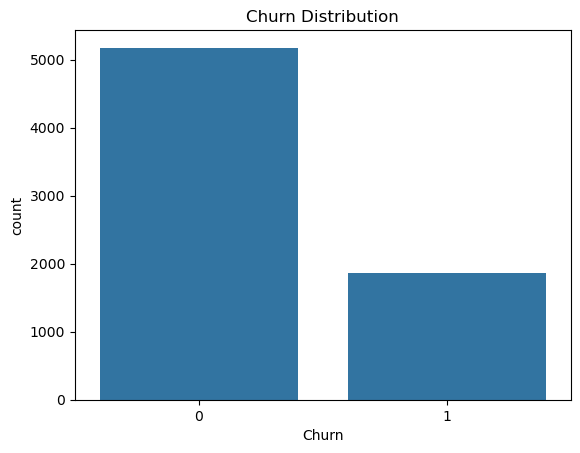

Churn
0    5174
1    1869
Name: count, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts()


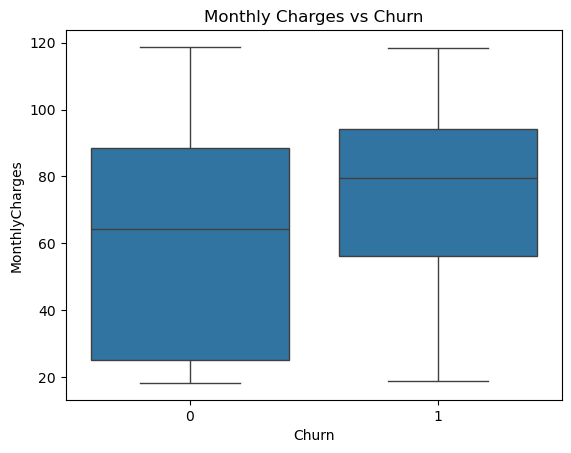

In [17]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

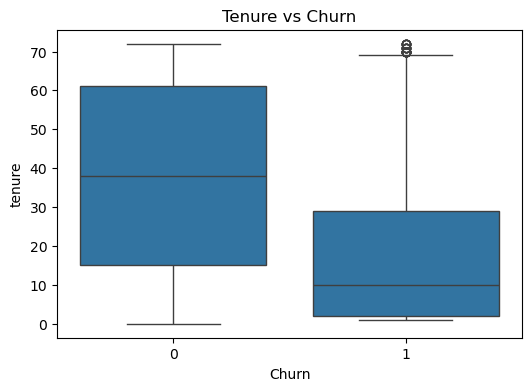

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


In [19]:
df.duplicated().sum()

np.int64(22)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64
After SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

In [27]:
y_pred_rf=rf.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.60      0.60      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



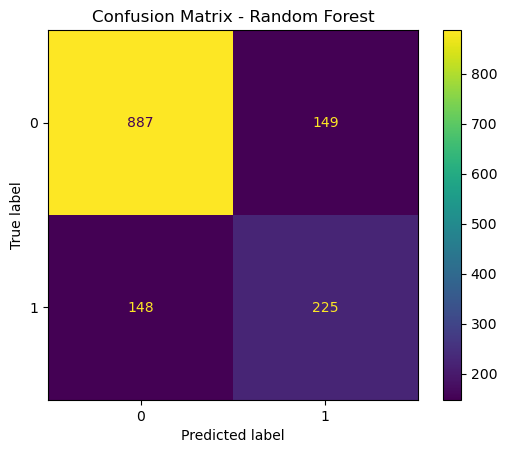

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

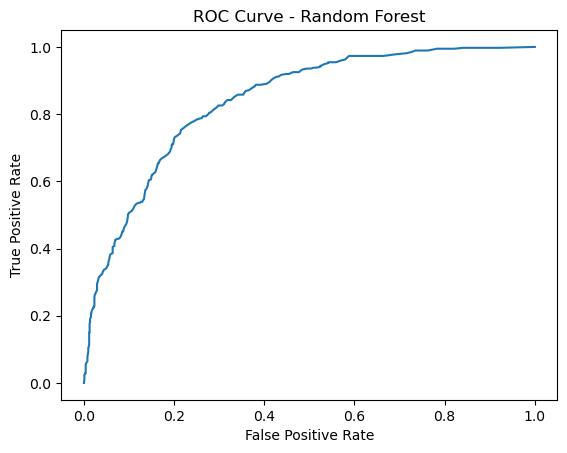

AUC Score: 0.8404152908174357


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_pred_prob))


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Evaluate both models
evaluate_model(y_test, y_pred, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression Metrics:
Accuracy: 0.8204
Precision: 0.6852
Recall: 0.5952
F1 Score: 0.6370

Random Forest Metrics:
Accuracy: 0.7892
Precision: 0.6016
Recall: 0.6032
F1 Score: 0.6024



In [32]:
model_features = x.columns  # store original training feature names


In [33]:
def predict_churn(customer_data):
    # Convert categorical variables
    customer_data = pd.get_dummies(customer_data, drop_first=True)
    
    # Add missing columns
    missing_cols = set(model_features) - set(customer_data.columns)
    for col in missing_cols:
        customer_data[col] = 0
    
    # Ensure correct column order
    customer_data = customer_data[model_features]
    
    # Scale input
    scaled_data = scaler.transform(customer_data)
    
    # Predict
    prediction = rf.predict(scaled_data)[0]
    probability = rf.predict_proba(scaled_data)[:, 1][0]
    
    return prediction, probability




In [36]:
import joblib
import os

# Create models folder if it does not exist
os.makedirs("../models", exist_ok=True)

# Save Random Forest Model
joblib.dump(rf, r"..\models\random_forest_model.pkl")

# Save Scaler (if used)
joblib.dump(scaler, r"..\models\scaler.pkl")

# Save Column names used in training (for future prediction)
joblib.dump(model_features, r"..\models\model_features.pkl")

print("✅ Model, scaler and features saved successfully!")


✅ Model, scaler and features saved successfully!


In [37]:
new_customer = pd.DataFrame({
    'tenure': [5],
    'MonthlyCharges': [85],
    'TotalCharges': [350],
    'Contract': ['Month-to-month'],
    'InternetService': ['Fiber optic'],
    'PaymentMethod': ['Electronic check'],
    'TechSupport': ['No']
})

prediction, probability = predict_churn(new_customer)

print("Prediction (1 = Churn):", prediction)
print("Churn Probability:", round(probability, 3))


Prediction (1 = Churn): 1
Churn Probability: 0.51
